<a href="https://colab.research.google.com/github/GustasAndre/RegressaoLogistica/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score , confusion_matrix , precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_excel("/content/Bank_Personal_Loan_Modelling.xlsx")
df.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [38]:
df.dtypes

,0
ID,int64
Age,int64
Experience,int64
Income,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal_Loan,int64
Securities_Account,int64


In [39]:
df.describe()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [40]:
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0


In [41]:
df = df.drop("ID", axis= 1)

In [42]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [43]:
y = df["Personal_Loan"]
x = df[["Age", "Experience", "Income","Family", "CCAvg", "Education", "Mortgage", "Securities_Account", "CD_Account", "Online", "CreditCard"]]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


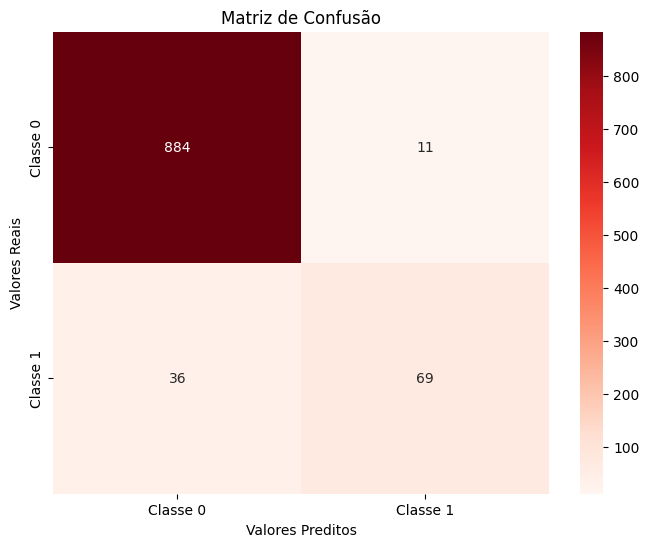

In [56]:
cm = confusion_matrix( y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.ylabel('Valores Reais')
plt.xlabel('Valores Preditos')
plt.title('Matriz de Confusão')
plt.show()


In [76]:
print("*****Métricas de Avaliação:*****")
print("Acurácia:")
print(f"Acurácia Teste: {accuracy_score(y_test, y_pred):.3f}")
print(f"Acurácia Treino: {accuracy_score(y_train, model.predict(X_train)):.3f}")
print("==========================================")
print("Acurácia Balanceada:")
print(f"Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, y_pred):.3f}")
print(f"Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, model.predict(X_train)):.3f}")
print("==========================================")
print("Precisão:")
print(f"Precisão Teste: {precision_score(y_test, y_pred):.3f}")
print(f"Precisão Treino: {precision_score(y_train, model.predict(X_train)):.3f}")
print("==========================================")
print("Recall:")
print(f"Recall Teste: {recall_score(y_test, y_pred):.3f}")
print(f"Recall Treino: {recall_score(y_train, model.predict(X_train)):.3f}")
print("==========================================")
print("F1 Score:")
print(f"F1 Score Teste: {f1_score(y_test, y_pred):.3f}")
print(f"F1 Score Treino: {f1_score(y_train, model.predict(X_train)):.3f}")
print("==========================================")

*****Métricas de Avaliação:*****
Acurácia:
Acurácia Teste: 0.953
Acurácia Treino: 0.949
Acurácia Balanceada:
Acurácia Balanceada Teste: 0.822
Acurácia Balanceada Treino: 0.783
Precisão:
Precisão Teste: 0.863
Precisão Treino: 0.825
Recall:
Recall Teste: 0.657
Recall Treino: 0.579
F1 SCORE:
F1 Score Teste: 0.746
F1 Score Treino: 0.680


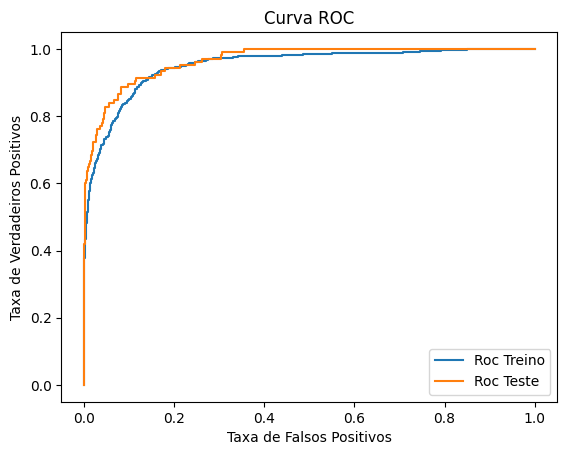

In [78]:
fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

plt.plot(fpr_train, tpr_train, label="Roc Treino")
plt.plot(fpr_test, tpr_test, label="Roc Teste")
plt.legend()
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC")
plt.show()